In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
airfoil_self_noise = fetch_ucirepo(id=291)

# data (as pandas dataframes)
X = airfoil_self_noise.data.features
y = airfoil_self_noise.data.targets

# metadata
print(airfoil_self_noise.metadata)

# variable information
print(airfoil_self_noise.variables)


{'uci_id': 291, 'name': 'Airfoil Self-Noise', 'repository_url': 'https://archive.ics.uci.edu/dataset/291/airfoil+self+noise', 'data_url': 'https://archive.ics.uci.edu/static/public/291/data.csv', 'abstract': 'NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1503, 'num_features': 5, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['scaled-sound-pressure'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VW2C', 'creators': ['Thomas Brooks', 'D. Pope', 'Michael Marcolini'], 'intro_paper': None, 'additional_info': {'summary': 'The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of

In [3]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

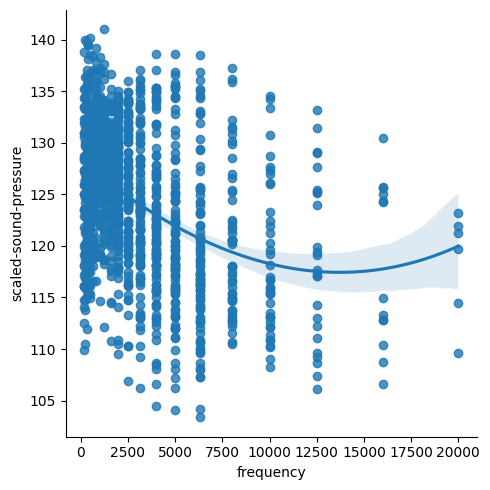

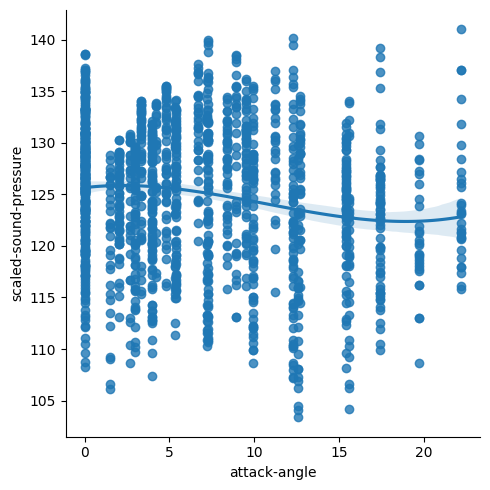

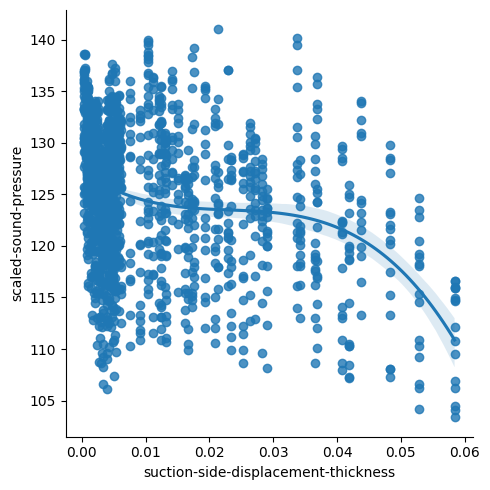

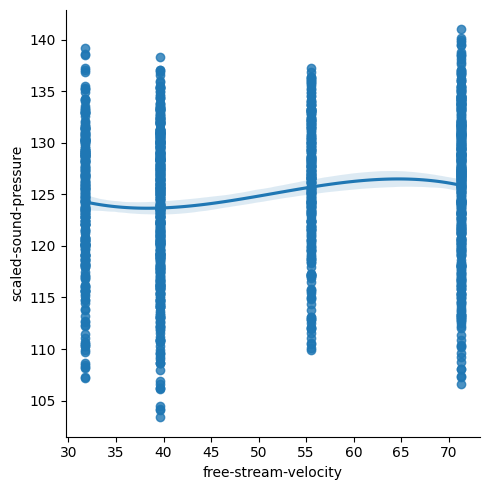

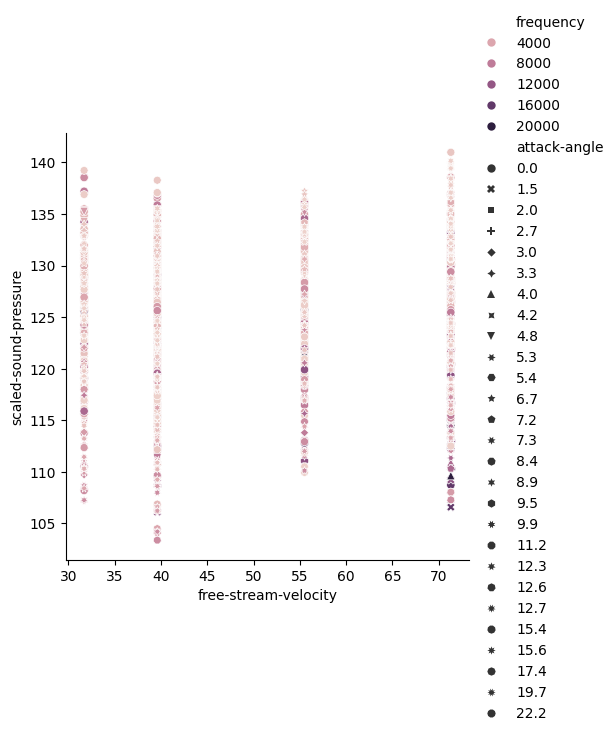

In [20]:
dat = pd.concat([X['frequency'],y['scaled-sound-pressure']], axis=1)
sns.lmplot(x='frequency', y='scaled-sound-pressure',order=3, data=dat)

dat = pd.concat([X['attack-angle'], y['scaled-sound-pressure']], axis=1)
sns.lmplot(x='attack-angle', y='scaled-sound-pressure',order=3, data=dat)

dat = pd.concat([X['suction-side-displacement-thickness'],y['scaled-sound-pressure']], axis=1)
sns.lmplot(x='suction-side-displacement-thickness', y='scaled-sound-pressure',order=3, data=dat)

dat = pd.concat([X['free-stream-velocity'],y['scaled-sound-pressure']], axis=1)
sns.lmplot(x='free-stream-velocity', y='scaled-sound-pressure',order=3, data=dat)

dat = pd.concat([X['free-stream-velocity'],y['scaled-sound-pressure']], axis=1)
sns.relplot(x='free-stream-velocity', y='scaled-sound-pressure',data=dat,hue=X['frequency'], style=X['attack-angle'])


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('MSE : ', mean_squared_error(y_test, predictions))
print('MAE : ', mean_absolute_error(y_test, predictions))

MSE :  21.21305715769316
MAE :  3.510346177232778
